Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y

array([4, 1, 2, 5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
phiP = PolynomialFeatures(1)
phi = phiP.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
phiT = np.transpose(phi)
phiTphi = np.matmul(phiT, phi)
phiTphiInv = linalg.inv(phiTphi)
pseudoInverse = np.matmul(phiTphiInv, phiT)

_w = np.matmul(pseudoInverse, y)

phiPlus = linalg.pinv(phi)
w = np.matmul(phiPlus, y)

w, _w

(array([2.2       , 0.45714286]), array([2.2       , 0.45714286]))

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

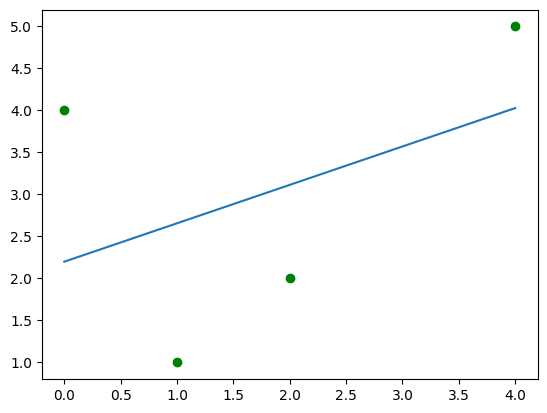

In [5]:
from sklearn.metrics import mean_squared_error
h = np.dot(phi, w)

training_error1 = mean_squared_error(y, h)

plt.plot(X, y, 'go', X, h)
plt.show()


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
  phiInv = linalg.inv(phi)
  w = np.dot(phiInv, y)
except:
  print('Cannot create inverse of the matrix Phi')

phi_higher_d = PolynomialFeatures(3).fit_transform(X)
print(phi_higher_d)
phiInv = linalg.inv(phi_higher_d)
w = np.dot(phiInv, y)
w

Cannot create inverse of the matrix Phi
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]


array([ 4.        , -5.91666667,  3.375     , -0.45833333])

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression().fit(phi, y)
print(Lr.intercept_, Lr.coef_)

prediction = Lr.predict(phi)

training_error2 = mean_squared_error(y, prediction)

training_error1, training_error2

2.2 [0.         0.45714286]


(2.0428571428571427, 2.0428571428571427)

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, np.size(X))

N = 50
sigma = 200

def f(x):
    return 5 + x - 2 * (x ** 2) - 5 * (x ** 3)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array(x) for x in np.linspace(x1,x2,N)])

In [10]:
x = make_instances(-5, 5, N)

y = make_labels(x, f, sigma)

x, y

(array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ]),
 array([ 771.25093967,  536.78956885,  543.86556979,  117.21193571,
          26.68863344,  321.51494365,  316.22440874,  174.87930408,
         434.48675569,  108.93878359,   53.51957458, -246.40820416,
          52.90748295,  228.25837292,  -60.82874496,  259.004888

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

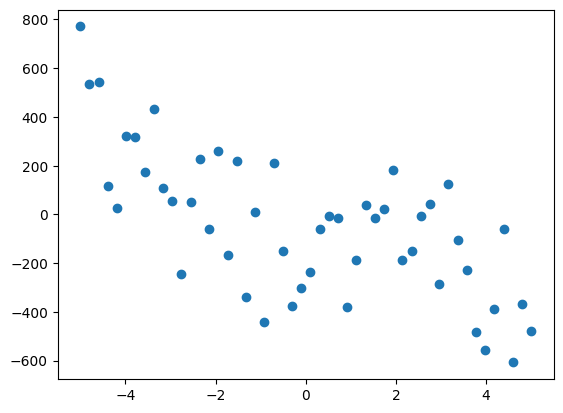

In [11]:
plt.scatter(x, y);

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

34661.950791912706

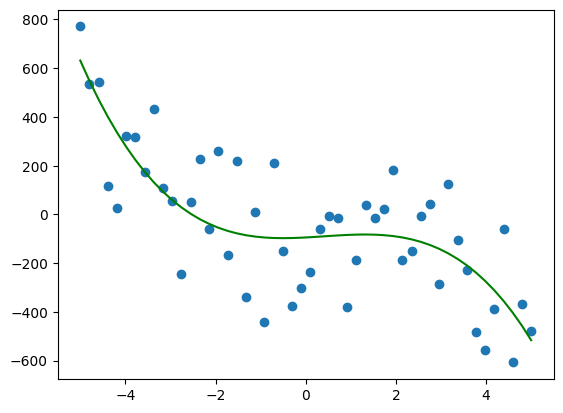

In [12]:
phi_d3 = PolynomialFeatures(3).fit_transform(x.reshape(-1, 1))

w_d3 = np.dot(linalg.pinv(phi_d3), y)
h_d3 = np.dot(phi_d3, w_d3)

training_error3 = mean_squared_error(y, h_d3)
plt.scatter(x, y);
plt.plot(x, h_d3, 'g')
training_error3

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Greska za model slozenosti d=1: 46854.238746500974
Greska za model slozenosti d=3: 34661.950791912706
Greska za model slozenosti d=5: 34485.9200891666
Greska za model slozenosti d=10: 29783.09126380543
Greska za model slozenosti d=20: 20561.121105130333


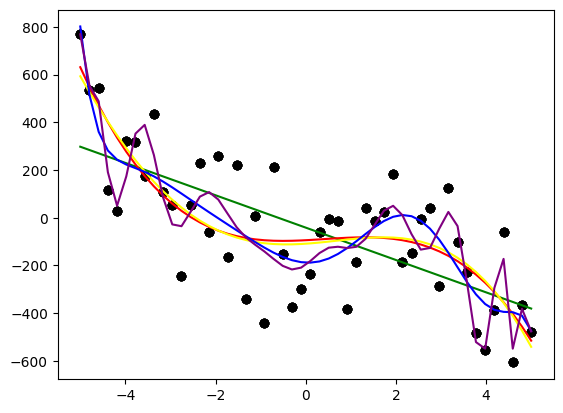

In [13]:
colors = ['green', 'red', 'yellow', 'blue', 'purple']
for index, i in enumerate([1, 3, 5, 10, 20]):
  phi_di = PolynomialFeatures(i).fit_transform(x.reshape(-1, 1))

  w_di = np.dot(linalg.pinv(phi_di), y)
  h_di = np.dot(phi_di, w_di)

  training_error_i = mean_squared_error(y, h_di)
  plt.scatter(x, y, color='black');
  plt.plot(x, h_di, color=colors[index])
  print(f'Greska za model slozenosti d={i}:', training_error_i)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

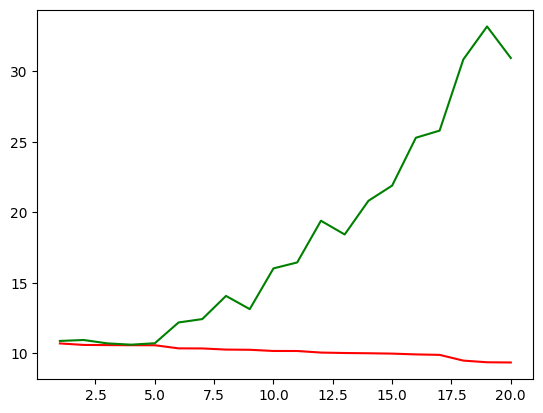

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

d = range(1, 21)
errors_train = []
errors_test = []

for i in d:
  phi_di_train = PolynomialFeatures(i).fit_transform(X_train.reshape(-1, 1))
  phi_di_test = PolynomialFeatures(i).fit_transform(X_test.reshape(-1, 1))

  w_di_train = np.dot(linalg.pinv(phi_di_train), y_train)

  h_di_train = np.dot(phi_di_train, w_di_train)
  h_di_test = np.dot(phi_di_test, w_di_train)

  error_di_train = mean_squared_error(y_train, h_di_train)
  error_di_test = mean_squared_error(y_test, h_di_test)

  errors_train.append(np.log(error_di_train))
  errors_test.append(np.log(error_di_test))

plt.plot(d, errors_train, 'r', d, errors_test, 'g');
  

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

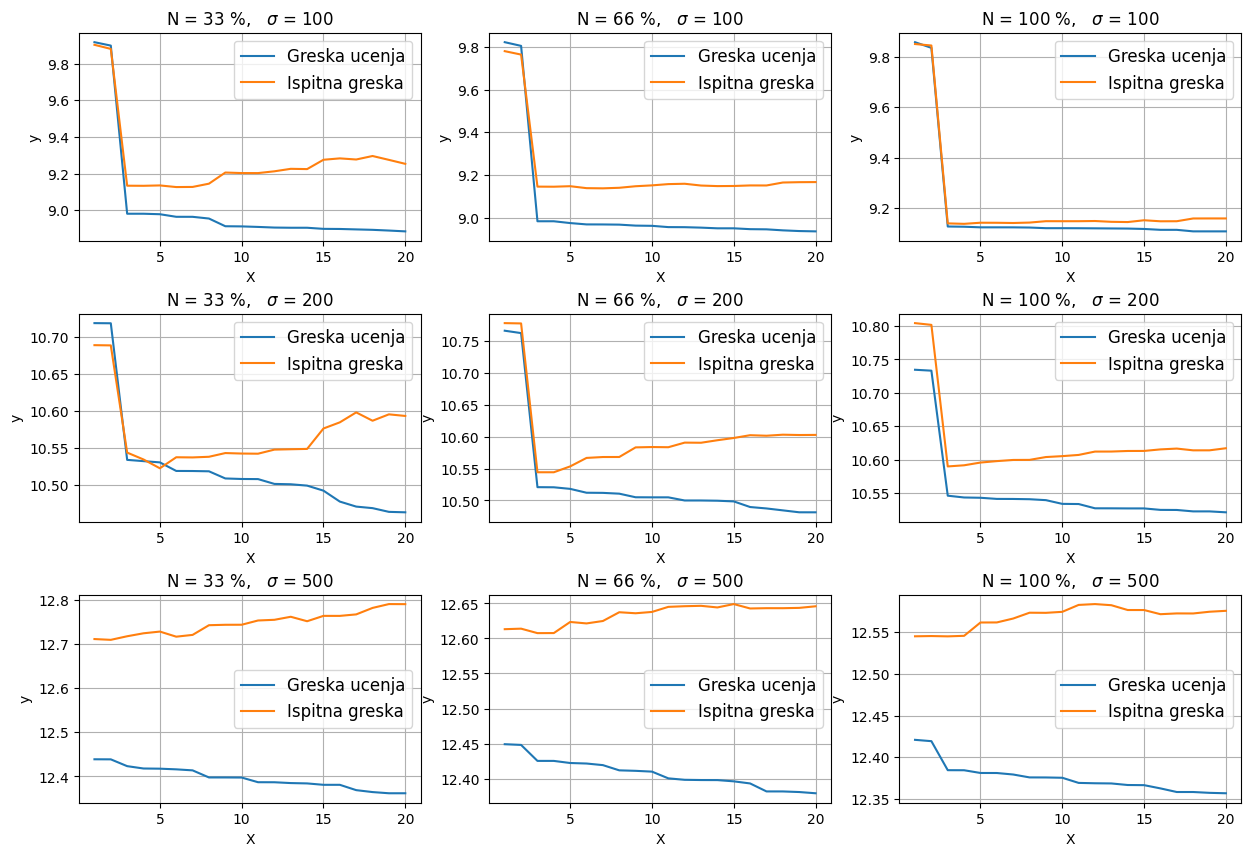

In [15]:
N = 1000
X = make_instances(-5, 5, N)
X_train, X_test = train_test_split(X, test_size = 0.5)
sigmas = [100, 200, 500]
sizes = [1/3, 2/3, 1]

def get_errors(X_train, X_test, Y_train, Y_test):
  errors_train_d = []
  errors_test_d = []
  for i in d:
    phi_train = PolynomialFeatures(i).fit_transform(X_train.reshape(-1, 1))
    phi_test = PolynomialFeatures(i).fit_transform(X_test.reshape(-1, 1))

    w_train = np.dot(linalg.pinv(phi_train), Y_train)

    h_train = np.dot(phi_train, w_train)
    h_test = np.dot(phi_test, w_train)

    error_train = mean_squared_error(Y_train, h_train)
    error_test = mean_squared_error(Y_test, h_test)

    errors_train_d.append(error_train)
    errors_test_d.append(error_test)

  return errors_train_d, errors_test_d

errors_train = []
errors_test = []

for s in sigmas:
  Y_train_i = make_labels(X_train, f, s)
  Y_test_i = make_labels(X_test, f, s)
  
  for size in sizes:
    X_train_size_i = X_train[0:int(len(X_train) * size)]
    X_test_size_i = X_test[0:int(len(X_test) * size)]
    Y_train_size_i = Y_train_i[0:int(len(Y_train_i) * size)]
    Y_test_size_i = Y_test_i[0:int(len(Y_test_i) * size)]

    error_train, error_test = get_errors(X_train_size_i, X_test_size_i, Y_train_size_i, Y_test_size_i)
    errors_train.append(np.log(error_train))
    errors_test.append(np.log(error_test))


fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace = 0.35) 
Nn = [1/3 * 100, 2/3 * 100, 3/3 * 100, 1/3 * 100, 2/3 * 100, 3/3 * 100, 1/3 * 100, 2/3 * 100, 3/3 * 100]
sgm = [100, 100, 100, 200, 200, 200, 500, 500, 500]

for i in range(0, 9):    
    ax = fig.add_subplot(3, 3, i+1)
    plt.plot(d, errors_train[i], d, errors_test[i])
    plt.xlabel('X'), plt.ylabel('y')
    plt.legend(['Greska ucenja', 'Ispitna greska'], loc='best', prop={'size':12})
    plt.title('N = %d %%,   $\sigma$ = %d' % (Nn[i], sgm[i]) )
    ax.grid()



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
from numpy import linalg
lambdas = [0, 1, 10]
d = 3
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

def L2_regularized_w(X, y, alpha, d):
  phi = PolynomialFeatures(d).fit_transform(X.reshape(-1, 1))
  phiTphi = np.matmul(phi.T, phi)
  regexp = np.identity(d + 1)
  regexp[0][0] = 0
  regexp = alpha * regexp

  phiTphi_with_regexp = np.add(regexp, phiTphi)

  phiTphiInv = linalg.inv(phiTphi_with_regexp)
  pseudoInverse = np.matmul(phiTphiInv, phi.T)
  w = np.matmul(pseudoInverse, y)

  return w

for l in lambdas:
  w = L2_regularized_w(X, y, l, d)
  print(w)


[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
phi = PolynomialFeatures(d).fit_transform(X.reshape(-1, 1))

for i in lambdas:
  model = Ridge(alpha=i).fit(phi, y)
  fit = model.fit(phi, y)
  score = model.score(phi, y)

  print(fit.intercept_, fit.coef_, score)


3.9999999999999645 [ 0.         -5.91666667  3.375      -0.45833333] 1.0
3.0569614512471652 [ 0.         -0.69079365 -0.2831746   0.1445805 ] 0.7513071825011184
2.494441843122973 [ 0.         -0.15897295 -0.13423067  0.0815601 ] 0.5997625808091073


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

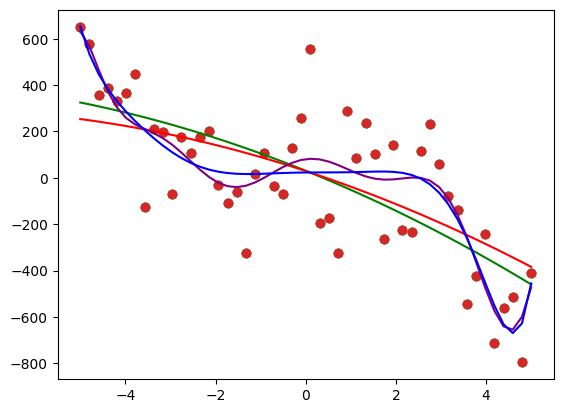

In [18]:
from sklearn.linear_model import Ridge
N = 50
X = make_instances(-5, 5, N)
Y = make_labels(X, f, sigma)
colors = ['green', 'red', 'purple', 'blue']
lambdas = [0, 100]
d = [2, 10]
hs = []

for i in d:
  phi = PolynomialFeatures(i).fit_transform(X.reshape(-1, 1))
  for l in lambdas:
    model = Ridge(alpha=l).fit(phi, Y)
    h = model.predict(phi)
    hs.append(h)

# fig = plt.figure(figsize=(15, 10))
# fig.subplots_adjust(wspace=0.2, hspace = 0.2)

for i in range(len(hs)):
  # ax = fig.add_subplot(2, 2, i+1)
  plt.plot(X, hs[i], color=colors[i])
  plt.scatter(X, Y)


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


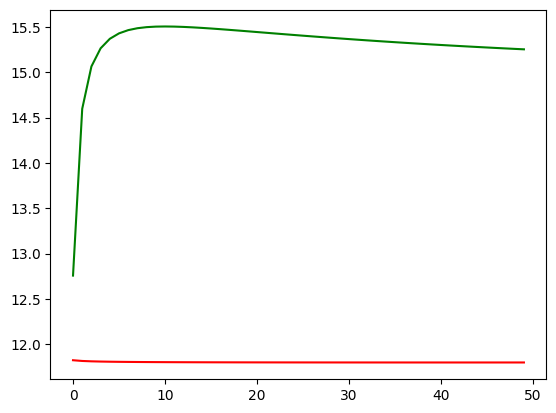

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

lambdas = range(0, 50)
d = 10
errors_train = []
errors_test = []

phi_di_train = PolynomialFeatures(d).fit_transform(X_train.reshape(-1, 1))
phi_di_test = PolynomialFeatures(d).fit_transform(X_test.reshape(-1, 1))

for l in lambdas:
  model_train = Ridge(alpha=l).fit(phi_di_train, Y_train)
  model_test = Ridge(alpha=l).fit(phi_di_train, Y_train)

  h_train = model_train.predict(phi_di_train)
  h_test = model_test.predict(phi_di_test)

  error_di_train = mean_squared_error(y_train, h_train)
  error_di_test = mean_squared_error(y_test, h_test)

  errors_train.append(np.log(error_di_train))
  errors_test.append(np.log(error_di_test))

plt.plot(lambdas, errors_train, 'r', lambdas, errors_test, 'g');

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

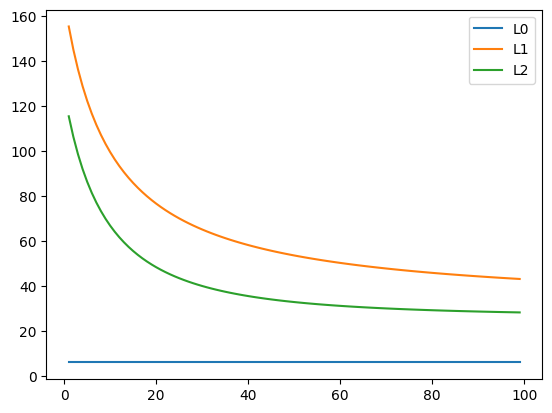

In [21]:
from sklearn.linear_model import Ridge
import math
N = 50
sigma = 200
d = 5
lambdas = range(1,100)

X = make_instances(-5, 5, N)
Y = make_labels(X, f, sigma)

L0, L1, L2 = [], [], []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
phi_di_train = PolynomialFeatures(d).fit_transform(X_train.reshape(-1, 1))

for l in lambdas:
  w = L2_regularized_w(X_train, Y_train, l, d)

  L0.append(nonzeroes(w))
  L1.append(linalg.norm(w, 1))
  L2.append(linalg.norm(w, 2))

plt.plot(lambdas, L0, lambdas, L1, lambdas, L2)
plt.legend(['L0', 'L1', 'L2'], loc = 'best');


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

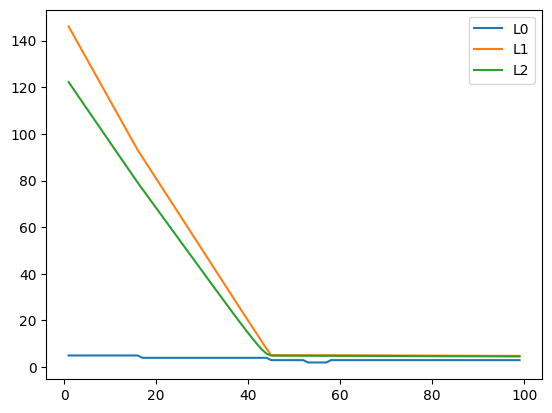

In [22]:
from sklearn.linear_model import Lasso
L0, L1, L2 = [], [], []
for l in lambdas:
  model = Lasso(alpha=l).fit(phi_di_train, Y_train)
  w = model.coef_

  L0.append(nonzeroes(w))
  L1.append(linalg.norm(w, 1))
  L2.append(linalg.norm(w))

plt.plot(lambdas, L0, lambdas, L1, lambdas, L2)
plt.legend(['L0', 'L1', 'L2'], loc = 'best');

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

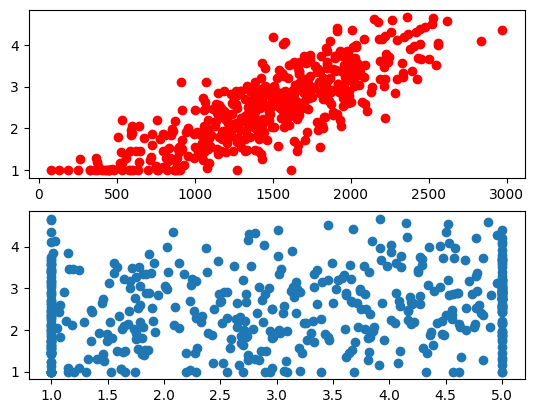

In [24]:
fig, axs = plt.subplots(2)
axs[0].scatter(exam_score, grades_y, color='red')
axs[1].scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
l = 0.01
model = Ridge(alpha=l).fit(grades_X, grades_y)
model.coef_, model.intercept_

(array([0.00141497, 0.09477276]), 0.15061179575776018)

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_Y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

model = Ridge(alpha=l).fit(grades_X_fixed, grades_Y_fixed)
model.coef_, model.intercept_

(array([[0.81630375, 0.15167761]]), array([8.62551331e-17]))

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
grades_X_fixed_colinear = np.array([exam_score,grade_in_highschool,grade_in_highschool]).T
grades_X_fixed_colinear

array([[1.95800000e+03, 1.86706705e+00, 1.86706705e+00],
       [1.19800000e+03, 2.27906831e+00, 2.27906831e+00],
       [2.08100000e+03, 2.24977689e+00, 2.24977689e+00],
       ...,
       [1.29600000e+03, 4.16787778e+00, 4.16787778e+00],
       [1.88600000e+03, 4.81613585e+00, 4.81613585e+00],
       [1.45100000e+03, 4.77186131e+00, 4.77186131e+00]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
model = Ridge(alpha=l).fit(grades_X_fixed_colinear, grades_y)
model.coef_, model.intercept_

(array([0.00141497, 0.04738661, 0.04738661]), 0.150610568810285)

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
l1 = 0.01
l2 = 1000

ws1, ws2, ws3, ws1_2, ws2_2, ws3_2 = ([] for i in range(6))

for i in range(0, 10):
  X_train, X_test, Y_train, Y_test = train_test_split(grades_X_fixed_colinear, grades_Y_fixed, test_size=0.5)
  model1 = Ridge(alpha=l1).fit(X_train, Y_train)
  model2 = Ridge(alpha=l2).fit(X_test, Y_test)

  ws1.append(model1.coef_[0][0])
  ws2.append(model1.coef_[0][1])
  ws3.append(model1.coef_[0][2])
  ws1_2.append(model2.coef_[0][0])
  ws2_2.append(model2.coef_[0][1])
  ws3_2.append(model2.coef_[0][2])
    
print(np.std(ws1))
print(np.std(ws2))
print(np.std(ws3))
print(np.std(ws1_2))
print(np.std(ws2_2))
print(np.std(ws3_2))

2.1097334393038268e-05
0.008393351617294325
0.008393351617328227
2.365841690483756e-05
0.00452585034613617
0.004525850346136171


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.